## Decision Tree

### Methodology


*   ###### **Data Cleaning:** Checking for null values and based on their number either droping them or replacing with mean, median, mode based on the type and description of data. Droping decscrete and catagorical variables that have highly skewed histograms.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data. In case of catagorical variables it also helps in feature selection.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit. Here we need to use Decision Tree.

*   ###### **Evalution:** In this case we are using RMSE, R2 Score to determine the accuracy of the predicting model.



##### importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"drive/My Drive/biddings.csv")

##### Null value percentages

In [ ]:
Null=[]
for i in df:
    Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

,class,per
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
84,84,0.0
85,85,0.0
86,86,0.0
87,87,0.0


ALL the columns are having nonull values

In [ ]:
df.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
            ...   
84         float64
85         float64
86         float64
87         float64
convert      int64
Length: 89, dtype: object

All the Data types are float

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
c=df.columns
df[c[-1]].value_counts()/len(df)*100

0    99.8092
1     0.1908
Name: convert, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


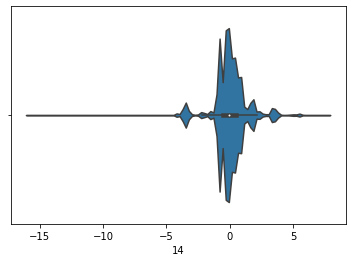

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(df['14'])


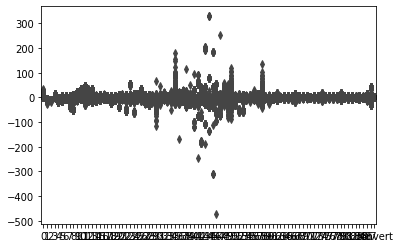

In [ ]:
sns.boxplot(data=df)

In [ ]:
cols = [col for col in df.columns if col not in ["convert"]]
X = df[cols]

In [ ]:
from sklearn.preprocessing import Normalizer
trans = Normalizer().fit(X)
X=trans.transform(X)

In [ ]:
y=df["convert"]
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X, y = rus.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x=X.reshape(88,3816)
x[1].shape

(3816,)

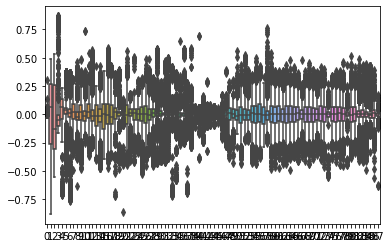

In [ ]:
sns.boxplot(data=X)

In [ ]:
"""from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)"""

'from sklearn.decomposition import PCA\npca = PCA(n_components=10)\nX = pca.fit_transform(X)'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
model =LR()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6644823066841415

In [ ]:
model.score(X_test, y_test)

0.6112565445026178

Decision Tree

In [ ]:
from sklearn import tree
model =tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.990170380078637

In [ ]:
model.score(X_test, y_test)

0.5287958115183246

In [ ]:
list(y).count(1)

1908

In [ ]:
list(y).count(0)

1908